In [1]:
import sys
import os
#homedir = os.path.dirname(os.path.abspath(__file__))
homedir = os.path.abspath('')
sys.path.append(os.path.dirname(os.path.dirname(homedir)))
#print(os.path.dirname(os.path.dirname(homedir)))

In [2]:
from EVA8_assignments.models.custom_resnet import get_customResNet
from EVA8_assignments.models.utils.train_loop import train, test, get_schedulder, sgd_optim
from EVA8_assignments.models.utils.data_utils import get_augmented_cifar10_dataset, default_train_transforms, default_test_transforms, assn8_train_transforms, assn8_test_transforms

In [3]:
custom_resnet = get_customResNet()

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
SEED = 1
use_cuda = torch.cuda.is_available()
torch.manual_seed(SEED)
if use_cuda:
    torch.cuda.manual_seed(SEED)
device = torch.device("cuda" if use_cuda else "cpu")

/home/raghuc/miniconda3/lib/python3.10/site-packages/torch/cuda/__init__.py:88: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525541990/work/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [5]:
cifar10_trainloader, cifar10_testloader = get_augmented_cifar10_dataset("/home/raghuc/work/data/", train_tfms=assn8_train_transforms, test_tfms=assn8_test_transforms, batch_sz=512, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
import copy
from torch_lr_finder import LRFinder

In [7]:
model_copy = copy.deepcopy(custom_resnet)

In [8]:
model_copy.to(device)

customResNet(
  (prep): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (X1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (l2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (X2): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, 

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_copy.parameters(), lr=5e-3, momentum=0.9)



In [10]:
# EPOCHS = 20

# train_losses = []
# train_acc = []
# test_losses = []
# test_acc = []
# for epoch in range(EPOCHS):
#     print("EPOCH:", epoch)
#     train(model_copy, device, cifar10_trainloader, optimizer, epoch, train_losses, train_acc)
#     #lr_scheduler.step()
#     test(model_copy, device, cifar10_testloader, test_losses, test_acc)

In [11]:
lr_finder = LRFinder(model_copy, optimizer, criterion, device=device)

In [12]:
lr_finder.range_test(cifar10_testloader, end_lr=0.1, num_iter=100)

  0%|          | 0/100 [00:00<?, ?it/s]

/home/raghuc/work/EVA8_assignments/models/custom_resnet.py:107: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


Learning rate search finished. See the graph with {finder_name}.plot()


LR suggestion: steepest gradient
Suggested LR: 1.49E-02


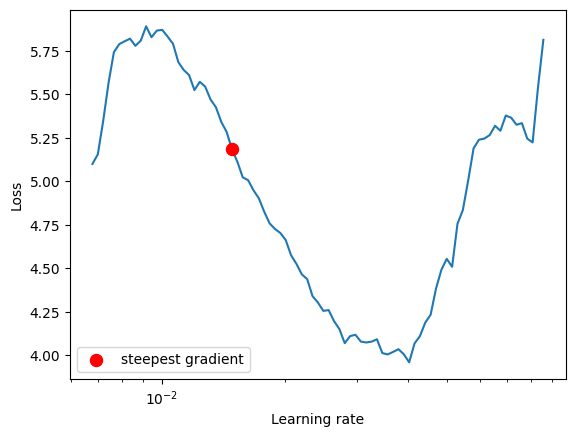

(<AxesSubplot: xlabel='Learning rate', ylabel='Loss'>, 0.014861813974730291)

In [13]:
lr_finder.plot()